In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

from astropy.table import Table
import astropy.units as u
import astropy.coordinates as coord
from astropy.io import ascii

from pyia import GaiaData
import gala.coordinates as gc

In [2]:
plt.style.use('notebook')

In [3]:
g = GaiaData('../data/gd1-with-masks.fits')
stream = g[g.pm_mask & g.gi_cmd_mask]

In [4]:
pmem = np.load('../data/pmem.npy')

In [7]:
tiso = Table.read('../data/gd1_iso.txt', format='ascii.commented_header', header_start=8)

In [27]:
dm = 5*np.log10(7600) - 5
print(dm)

14.404067961403957


(0, 1)

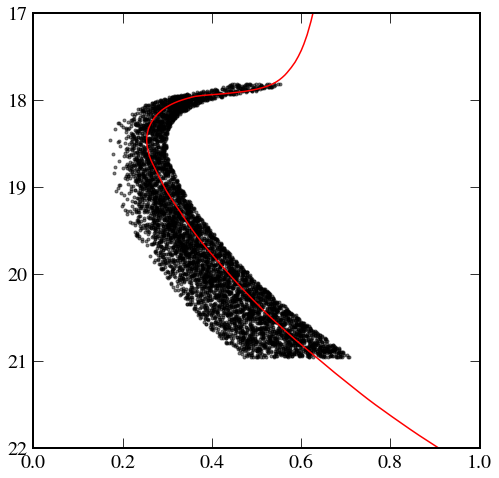

In [28]:
plt.plot(stream.g0-stream.i0, stream.g0, 'k.', alpha=0.5)
plt.plot(tiso['gp1']-tiso['ip1'], tiso['gp1']+dm, 'r-')

plt.ylim(22,17)
plt.xlim(0,1)

In [32]:
tlf = Table.read('../data/gd1_lf.txt', format='ascii.commented_header', header_start=8)
tlf['gp1'] += dm

In [33]:
tlf

N,gp1,Log10(N),Log10(dN)
int64,float64,float64,float64
1,12.612067961403957,-0.73,-0.73
2,12.712067961403957,-0.4167,-0.7059
3,12.812067961403956,-0.2359,-0.7037
4,12.912067961403956,-0.0988,-0.6664
5,13.012067961403957,0.0124,-0.6337
6,13.112067961403957,0.1054,-0.6096
7,13.212067961403957,0.1827,-0.6051
8,13.312067961403956,0.2539,-0.5665
9,13.412067961403956,0.3186,-0.5398


In [43]:
for i in range(1, 156):
    print(i, 10**tlf['Log10(N)'][i] - 10**tlf['Log10(N)'][i-1], 10**tlf['Log10(dN)'][i], 
          10**tlf['Log10(N)'][i] - 10**tlf['Log10(N)'][i-1] - 10**tlf['Log10(dN)'][i],
         (10**tlf['Log10(N)'][i] - 10**tlf['Log10(N)'][i-1] - 10**tlf['Log10(dN)'][i]) / 10**tlf['Log10(N)'][i])

1 0.19688056697212794 0.19683394644420507 4.6620527922869304e-05 0.00012169624753054075
2 0.19780887822888055 0.1978335754143396 -2.469718545905497e-05 -4.251551684586589e-05
3 0.2156279209164833 0.21557579680386288 5.212411262042749e-05 6.543930442877259e-05
4 0.2324374925129753 0.2324341840392526 3.3084737227073724e-06 3.2153458215459606e-06
5 0.24571298872855962 0.2456970827636838 1.5905964875828627e-05 1.2478432068315685e-05
6 0.24832377795947602 0.24825614085898945 6.763710048657279e-05 4.441043035595036e-05
7 0.27132008273205566 0.27133136521506984 -1.1282483014185551e-05 -6.287886420748767e-06
8 0.2882514581961664 0.2885359954579745 -0.00028453726180810435 -0.00013662782281492698
9 0.30523940300016594 0.30492989203838 0.0003095109617859415 0.00012962119912941024
10 0.338654175615829 0.33892218687275544 -0.000268011256926437 -9.829989083046572e-05
11 0.3553029580825062 0.35497682446720913 0.0003261336152970973 0.00010582677580156719
12 0.3672856315326909 0.3670286784810968 0.0002

(-70, 5)

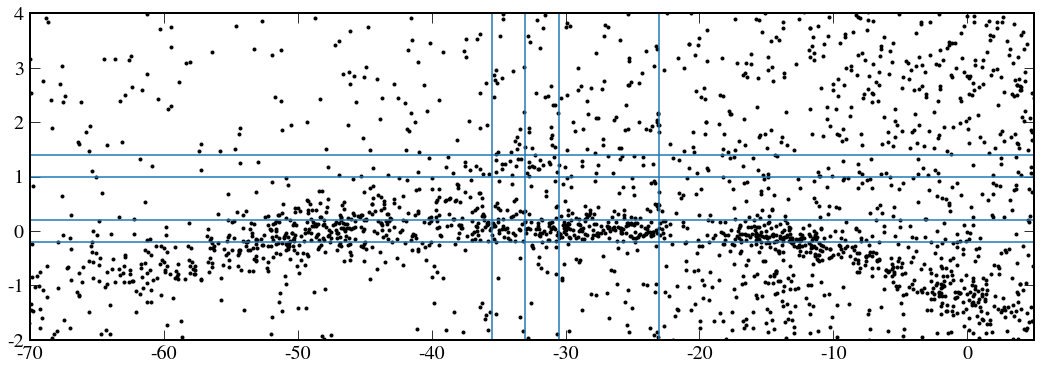

In [110]:
plt.figure(figsize=(18,6))
plt.plot(stream.phi1, stream.phi2, 'k.')

plt.axhline(-0.2)
plt.axhline(0.2)
plt.axvline(-23)
plt.axvline(-33)

plt.axhline(1)
plt.axhline(1.4)
plt.axvline(-30.5)
plt.axvline(-35.5)

plt.ylim(-2,4)
plt.xlim(-70,5)
# plt.gca().set_aspect('equal')

In [226]:
spatial_mask = ((stream.phi1<-23*u.deg) & (stream.phi1>-33*u.deg) & 
                (stream.phi2>-0.2*u.deg) & (stream.phi2<0.2*u.deg))
area = 10*0.4*u.deg**2

In [227]:
h, be = np.histogram(stream.g0[spatial_mask], bins=30)
bcen = 0.5*(be[1:]+be[:-1])
hcum = np.cumsum(h)

In [228]:
spur_mask = ((stream.phi1<-30.5*u.deg) & (stream.phi1>-35.5*u.deg) & 
                (stream.phi2>1*u.deg) & (stream.phi2<1.4*u.deg))
area_spur = 5*0.4*u.deg**2

In [229]:
h_spur, be_spur = np.histogram(stream.g0[spur_mask], bins=30)
bcen_spur = 0.5*(be_spur[1:]+be_spur[:-1])
hcum_spur = np.cumsum(h_spur)

In [230]:
area_acs = (202*u.arcsec)**2

In [231]:
(area_acs/area).decompose(), (area_acs/area_spur).decompose()

(<Quantity 0.00078711>, <Quantity 0.00157423>)

In [232]:
print((np.sum(spatial_mask)/area*area_acs).decompose(),
(np.sum(spur_mask)/area_spur*area_acs).decompose())

0.11334444444444444 0.03935570987654321


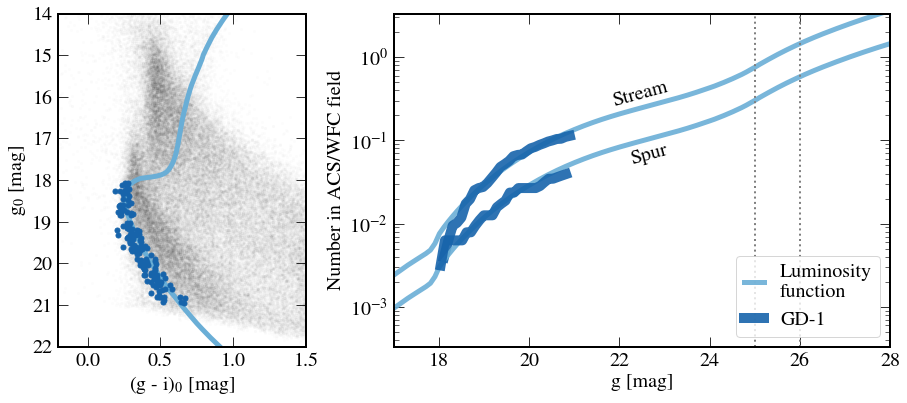

In [238]:
f = 1
f0 = 30
f_stre

lw_lf = 5
lw_gd1 = 10
c_lf = '0.3'
c_gd1 = 'k'
c_lf = mpl.cm.Blues(0.5)
c_gd1 = mpl.cm.Blues(0.8)
alpha = 0.9

c_guide = '0.5'
ls_guide = ':'
lw_guide = 2

fig, ax = plt.subplots(1,2,figsize=(13,6), gridspec_kw={'width_ratios':[1,2]})

plt.sca(ax[0])
plt.plot(g.g0[g.pm_mask]-g.i0[g.pm_mask], g.g0[g.pm_mask], 'k.', mec='none', alpha=0.01, rasterized=True, zorder=0)
plt.plot(stream.g0[spatial_mask]-stream.i0[spatial_mask], stream.g0[spatial_mask], 'o', ms=5, color=c_gd1, zorder=2)
plt.plot(tiso['gp1']-tiso['ip1'], tiso['gp1']+dm, '-', color=c_lf, lw=lw_lf, zorder=1)

plt.ylim(22,14)
plt.xlim(-0.2,1.5)

plt.xlabel('(g - i)$_0$ [mag]')
plt.ylabel('g$_0$ [mag]')

plt.sca(ax[1])
plt.plot(tlf['gp1'], (f*f_stream*10**tlf['Log10(N)']/area*area_acs).decompose(),
         color=c_lf, lw=lw_lf, alpha=alpha, label='Luminosity\nfunction')
plt.plot(bcen,(f*hcum/area*area_acs).decompose(),
         color=c_gd1, lw=lw_gd1, alpha=alpha, label='GD-1')

plt.plot(tlf['gp1'], (f*f_spur*10**tlf['Log10(N)']/area_spur*area_acs).decompose(),
         color=c_lf, lw=lw_lf, alpha=alpha, label='')
plt.plot(bcen_spur,(f*hcum_spur/area_spur*area_acs).decompose(),
         color=c_gd1, lw=lw_gd1, alpha=alpha, label='')

plt.axhline(20, lw=lw_guide, color=c_guide, ls=ls_guide)
# plt.axhline(15, lw=0.5)
plt.axvline(25, lw=lw_guide, color=c_guide, ls=ls_guide)
plt.axvline(26, lw=lw_guide, color=c_guide, ls=ls_guide)

plt.text(21.8, 7*f/f0, 'Stream', rotation=15, va='bottom', ha='left')
plt.text(22.2, 1.4*f/f0, 'Spur', rotation=15, va='bottom', ha='left')
plt.legend(frameon=True, fontsize='medium', handlelength=1, loc=4)

plt.gca().set_yscale('log')
plt.ylim(0.01*f/f0, 100*f/f0)
plt.xlim(17, 28)

plt.xlabel('g [mag]')
plt.ylabel('Number in ACS/WFC field')

plt.tight_layout()
plt.savefig('../plots/target_density.png')
plt.savefig('../plots/target_density.pdf', dpi=150)